In [34]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

# Ejericios Perceptron 

### Ejercicio 1

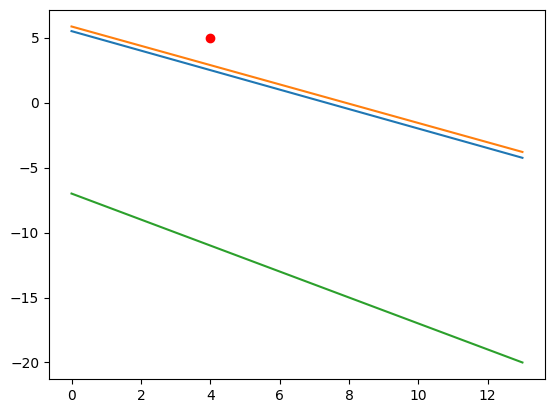

In [35]:
plt.scatter(4,5, color="red")
x1 = np.arange(-4,10)
x2 = -(3/4)*x1 + 10/4
x2_new = -(2.6/3.5)*x1 + 10.1/3.5
x3 = -x1 - 11
plt.plot(x2)
plt.plot(x2_new)
plt.plot(x3)
# plt.xlim(-1,11)10/4
# plt.ylim(-1,11)


### Ejercicio 2

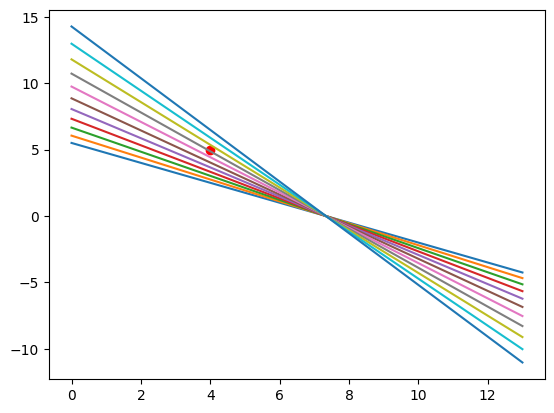

In [36]:
plt.scatter(4,5, color="red")
x1 = np.arange(-4,10)
a = -(3/4)
b = 10/4

epochs = 10
lr = -0.1
x2 = a*x1 + b
plt.plot(x2)


for _ in range(0,epochs):
    x2 = a*x1 + b
    a = (a-lr*a)
    b = (b-lr*b)
    x2 = a*x1 + b
    plt.plot(x2)

# Perceptron Con Entranamiento

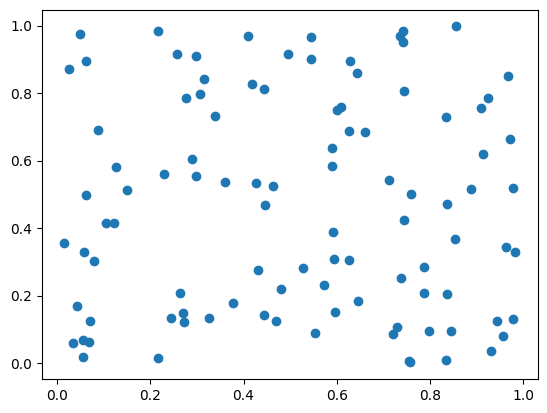

In [37]:
# Creación de 100 datos aleatorios 
data = np.random.rand(100,2)
x1_data = data[:,0]
x2_data = data[:,1]

plt.scatter(x1_data,x2_data)

In [38]:
# Creación de un clasificador con una función lineal
def clasificator(x1, x2):
    score = 1*(-2*x1 + x2 <= 0)
    return score

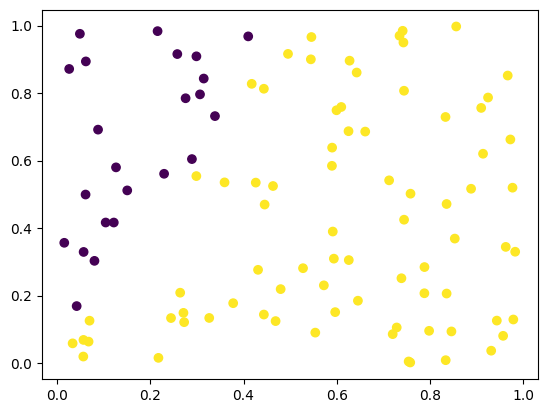

In [39]:
# Clasificación de datos 
clasicated_data = []
for x1, x2 in data:
   clasicated_data.append(clasificator(x1, x2)) 
plt.scatter(x1_data, x2_data, c=clasicated_data)


In [40]:
# Creación del dataframe
d = {'x1': x1_data, 'x2': x2_data, 'y':clasicated_data}
df = pd.DataFrame(data=d)
df

,x1,x2,y
0,0.272630,0.121042,1
1,0.527514,0.281042,1
2,0.593646,0.309300,1
3,0.741156,0.984725,1
4,0.719788,0.085561,1
...,...,...,...
95,0.742789,0.950073,1
96,0.545495,0.966278,1
97,0.067738,0.063396,1
98,0.738520,0.251232,1


In [41]:
# Creación clase perceptrón
class perceptron: 
    # Metodo constructor  
    def __init__(self, n_entradas):
        # Pesos aleatorios en funcion del número de entradas
        self.w = np.random.rand(n_entradas) 
        self.b = np.random.rand(1) 
        self.n = n_entradas

    # Función de entrenamiento del perceptron
    def train(self, x, y_obj, lr):
        # Salida con función escalón
        self.y = 1*(self.w.dot(x) + self.b > 0)
        self.x = x
        self.lr = lr
        # Actualización de los pesos y bias
        self.w = self.w + lr*(y_obj - self.y)*np.array(self.x)
        self.b = self.b + lr*(y_obj - self.y)

    # Predicción del resultado
    def predict(self, x):
        # Salida en base a los pesos finales 
        out = 1*(np.array(x).dot(self.w) + self.b > 0)
        return out
       
        
                    

In [42]:
class perceptron_sm: 
    # Metodo constructor  
    def __init__(self, n_entradas):
        # Pesos aleatorios en funcion del número de entradas
        self.w = np.random.rand(n_entradas) 
        self.b = np.random.rand(1) 
        self.n = n_entradas
        
    def softmax(self, x):
        d = []
        s = []
        for xj in x:
            d.append(np.exp(xj))
        for xi in x:
            s.append(np.exp(xi)/sum(d))
        return s

    # Función de entrenamiento del perceptron
    def out(self, x):
        # Salida con función escalón
        self.s = []
        x = np.transpose(x)
        for i in range(0, len(x)):
            self.s.append(self.w.dot(x[i]) + self.b)

        # Softmax 
        d = []
        self.y = []
        for xj in x:
            d.append(np.exp(xj))
        for xi in x:
            self.y.append(np.exp(xi)/sum(d))

        # Actualización de los pesos y bias
        # self.w = self.w + lr*(y_obj - self.y)*np.array(self.x)
        # self.b = self.b + lr*(y_obj - self.y)

    # Predicción del resultado
    def predict(self, x):
        # Salida en base a los pesos finales 
        out = 1*(np.array(x).dot(self.w) + self.b > 0)
        return out

In [43]:
# Creación del objeto perceptron
perceptron_model_sm = perceptron_sm(2)
# Creación de variable para guardar pesos
w_epoch = []
out_epoch = []
# Recorre los datos por el numero de epocas definidas
for epochs in range(0,20):
    m = 0
    # Recorre todos los datos del dataframe
   
        # Llama al metodo train pasando los datos de entrenamiento [x1,x2], salida deseada [y] y learning rate
    s = perceptron_model_sm.out([df['x1'], df['x2']])
    out_epoch.append(s)

    # Hace la predicción en base a los pesos obtenidos. El metodo predict recibe los datos [x1,x2] 
    for i in range(0,len(df)):
        out = perceptron_model_sm.predict([df['x1'][i], df['x2'][i]])
        # Contador de errores
        if out != df['y'][i]:
            m += 1
    w_epoch.append(perceptron_model_sm.w)
#perceptron_model_sm.softmax(out_epoch)    

In [44]:
x = [[df['x1']], [df['x2']]]

x = np.transpose(x)

x[1]

array([[0.52751389, 0.28104238]])

In [45]:
# Creación del objeto perceptron
perceptron_model = perceptron(2)
# Creación de variable para guardar pesos
w_epoch = []
# Recorre los datos por el numero de epocas definidas
for epochs in range(0,20):
    m = 0
    # Recorre todos los datos del dataframe
    for i in range(0, len(df)):
        # Llama al metodo train pasando los datos de entrenamiento [x1,x2], salida deseada [y] y learning rate
        perceptron_model.train([df['x1'][i], df['x2'][i]],df['y'][i], 0.01)
    # Hace la predicción en base a los pesos obtenidos. El metodo predict recibe los datos [x1,x2] 
    for i in range(0,len(df)):
        out = perceptron_model.predict([df['x1'][i], df['x2'][i]])
        # Contador de errores
        if out != df['y'][i]:
            m += 1
    w_epoch.append(perceptron_model.w)
    print(f"Epoch: {epochs} Error: {m/len(df)}")

Epoch: 0 Error: 0.23
Epoch: 1 Error: 0.23
Epoch: 2 Error: 0.28
Epoch: 3 Error: 0.26
Epoch: 4 Error: 0.22
Epoch: 5 Error: 0.21
Epoch: 6 Error: 0.19
Epoch: 7 Error: 0.14
Epoch: 8 Error: 0.11
Epoch: 9 Error: 0.1
Epoch: 10 Error: 0.11
Epoch: 11 Error: 0.08
Epoch: 12 Error: 0.05
Epoch: 13 Error: 0.02
Epoch: 14 Error: 0.03
Epoch: 15 Error: 0.01
Epoch: 16 Error: 0.01
Epoch: 17 Error: 0.01
Epoch: 18 Error: 0.01
Epoch: 19 Error: 0.01


Text(0.5, 1.0, 'Model trained. Lr: 0.01 Error: 1.0%')

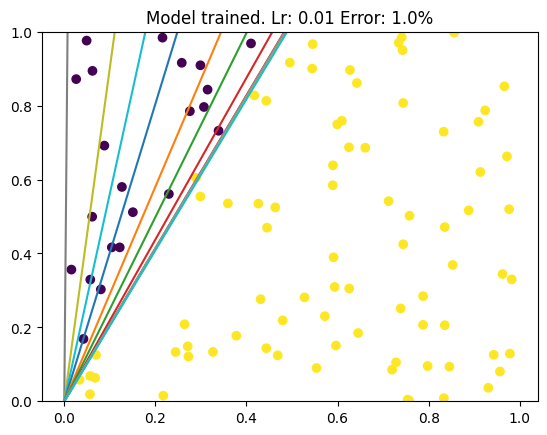

In [46]:
clasification = []
x_boundary = np.arange(0,1,0.01)
for i in range(0,len(df)):       
    out = perceptron_model.predict([df['x1'][i], df['x2'][i]])
    clasification.append(out)

x_boundary = np.arange(0,1,0.01)
for i in range(0, len(w_epoch)):
    x2 = -x_boundary*(w_epoch[i][0]/w_epoch[i][1])
    plt.plot(x_boundary, x2)
    plt.ylim([0,1])
plt.scatter(df['x1'], df['x2'], c=clasification)
plt.title(f"Model trained. Lr: {perceptron_model.lr} Error: {m/len(df) * 100}%")

# Datos suministrados

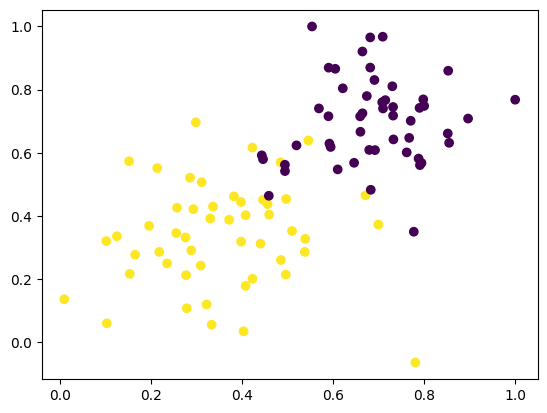

In [47]:
df = pd.read_csv('data.csv')
plt.scatter(df['x1'], df['x2'], c=df['y'])

In [48]:
perceptron_model_2 = perceptron(2)

w_epoch = []
b_epoch = []
# Recorre los datos por el numero de epocas definidas
for epochs in range(0,20):
    m = 0
    # Recorre todos los datos del dataframe
    for i in range(0, len(df)):
        # Llama al metodo train pasando los datos de entrenamiento [x1,x2], salida deseada [y] y learning rate
        perceptron_model_2.train([df['x1'][i], df['x2'][i]],df['y'][i], 0.01)  
    # Hace la predicción en base a los pesos obtenidos. El metodo predict recibe los datos [x1,x2] 
    for i in range(0,len(df)):
        out = perceptron_model_2.predict([df['x1'][i], df['x2'][i]])
        # Contador de errores
        if out != df['y'][i]:
            m += 1
    w_epoch.append(perceptron_model_2.w)
    b_epoch.append(perceptron_model_2.b)
    print(f"Epoch: {epochs} Error: {m/len(df)}")

Epoch: 0 Error: 0.5
Epoch: 1 Error: 0.45
Epoch: 2 Error: 0.4
Epoch: 3 Error: 0.38
Epoch: 4 Error: 0.34
Epoch: 5 Error: 0.36
Epoch: 6 Error: 0.3
Epoch: 7 Error: 0.26
Epoch: 8 Error: 0.27
Epoch: 9 Error: 0.17
Epoch: 10 Error: 0.19
Epoch: 11 Error: 0.14
Epoch: 12 Error: 0.17
Epoch: 13 Error: 0.18
Epoch: 14 Error: 0.18
Epoch: 15 Error: 0.12
Epoch: 16 Error: 0.13
Epoch: 17 Error: 0.13
Epoch: 18 Error: 0.14
Epoch: 19 Error: 0.15


Text(0.5, 1.0, 'Model trained. Lr: 0.01 Error: 15.0%')

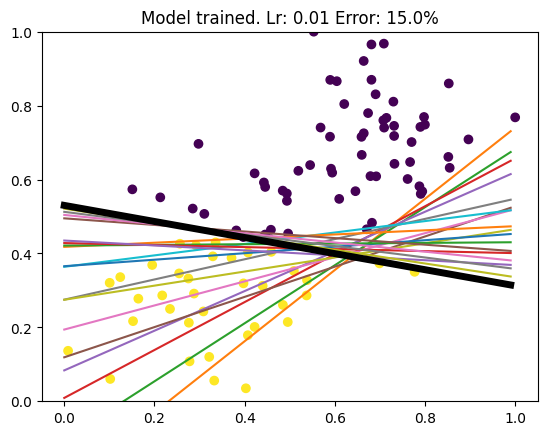

In [49]:
clasification = []
x_boundary = np.arange(0,1,0.01)
for i in range(0,len(df)):       
    out = perceptron_model_2.predict([df['x1'][i], df['x2'][i]])
    clasification.append(out)

x_boundary = np.arange(0,1,0.01)
for i in range(0, len(w_epoch)):
    x2 = -x_boundary*(w_epoch[i][0]/w_epoch[i][1]) - b_epoch[i]/w_epoch[i][1]
    plt.plot(x_boundary, x2)
    plt.ylim([0,1])
plt.plot(x_boundary, x2, linewidth=5, c='black')
plt.scatter(df['x1'], df['x2'], c=clasification)
plt.title(f"Model trained. Lr: {perceptron_model_2.lr} Error: {m/len(df) * 100}%")